# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

!wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2020-03-26 19:01:40--  https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.02s   

2020-03-26 19:01:40 (2.58 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,687,106,57,107,235,67,6,262,26,28,171,285,987,260,86,9,31,180,184
1,533,89,41,63,134,59,6,123,55,17,137,148,223,150,76,12,3,186,188
2,33,101,48,107,222,68,10,208,32,24,154,232,641,204,70,5,38,190,202
3,277,86,41,66,129,55,7,135,50,18,136,154,266,165,74,3,4,180,187
4,275,87,44,70,179,75,6,146,45,19,141,167,326,178,69,6,1,194,201
5,218,83,44,68,144,61,8,147,45,19,143,170,325,180,74,1,1,185,191
6,205,87,47,81,149,62,9,147,45,19,152,171,325,181,72,0,6,188,198
7,572,96,45,87,169,67,10,154,44,19,149,167,351,174,67,9,8,192,201
8,666,102,43,96,197,63,10,185,36,22,142,202,513,139,65,8,12,195,204
9,206,92,46,79,176,64,8,162,41,20,149,183,396,178,67,2,10,191,198


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,426.908925,93.595628,44.910747,82.169399,168.741348,61.799636,8.655738,168.444444,40.979964,20.553734,148.180328,188.375228,437.398907,175.041894,72.488160,6.293260,12.457195,188.978142,195.754098
std,243.417905,8.171768,5.957977,15.726520,33.697269,8.034138,4.386429,32.648413,7.706616,2.547958,13.991209,31.089425,173.347198,32.352304,7.339918,4.764487,8.696866,6.216257,7.437060
min,1.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,218.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,322.000000,151.000000,68.000000,2.000000,6.000000,184.000000,191.000000
50%,420.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,365.000000,174.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,637.000000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,197.000000,45.000000,23.000000,159.000000,216.000000,578.000000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,841.000000,119.000000,58.000000,112.000000,333.000000,138.000000,49.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,40.000000,204.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [5]:
from sklearn import preprocessing

# translation from categorical signs to quantitative signs
label_encoder = preprocessing.LabelEncoder()

label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
label_encoder.fit(y_test)
y_test = label_encoder.transform(y_test)

label_encoder.classes_

# scaling for best results
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [6]:
#!pip install scikit-plot

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns

You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
params = {'C': np.linspace(0.01, 1, 10), 'penalty':  ['l1', 'l2']}
lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

b_lr_cv = GridSearchCV(lr, params, scoring='accuracy', cv=5)
b_lr_cv.fit(X_train, y_train)

print(b_lr_cv.best_params_)
C = b_lr_cv.best_params_['C']
penalty = b_lr_cv.best_params_['penalty']

{'C': 1.0, 'penalty': 'l1'}


In [ ]:
b_lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=C, penalty=penalty)
b_lr.fit(X_train, y_train)

prediction = b_lr.predict(X_test)
print(accuracy_score(prediction, y_test))
print(f1_score(prediction, y_test, average='weighted'))

0.7643097643097643
0.7652475302911247


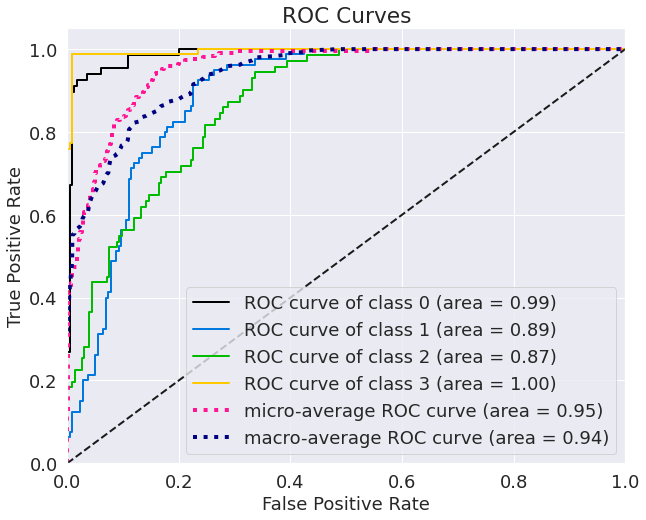

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

prediction = b_lr.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, prediction, figsize=(10, 8))
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
model_pca = PCA(n_components = X_train.shape[1])
pca = model_pca.fit(X_train)
print(pca.explained_variance_ratio_)

X = []
Y = []
for i in range(X_train.shape[1]):
    X.append(i)
    Y.append(0)
    Y[i] = Y[i-1] + pca.explained_variance_ratio_[i]

[4.97135493e-01 1.62550227e-01 9.50447907e-02 6.28943818e-02
 5.23768986e-02 4.93247980e-02 2.66402086e-02 1.95775844e-02
 1.16580987e-02 8.39412639e-03 4.63580986e-03 3.08001124e-03
 2.14009564e-03 1.75243500e-03 1.02989769e-03 7.70616797e-04
 6.58044642e-04 3.19351866e-04 1.71292625e-05]


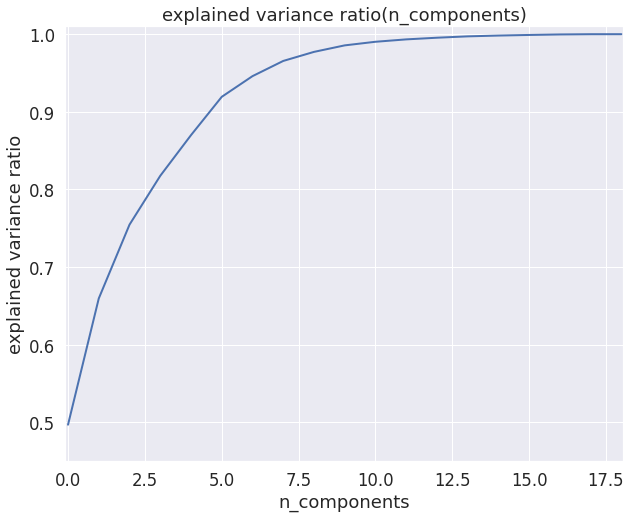

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(X, Y, lw=2)
plt.xlim([-0.1, 18.05])
plt.ylim([0.45, 1.01])
plt.xlabel('n_components')
plt.ylabel('explained variance ratio')
plt.title('explained variance ratio(n_components)')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
#@title Выберем n_components = 10, так как из графика видно, что 10 компонент описывается ~ 98% данных, что является неплохим результатом. Данные необходимо нормализовать, чтобы были точнее результаты.


In [ ]:
print(Y[9])

0.985596607991894


In [ ]:
pca = PCA(n_components = 10)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
params = {'C': np.linspace(0.01, 1, 10), 'penalty':  ['l1', 'l2']}
lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

b_lr_cv = GridSearchCV(lr, params, scoring='accuracy', cv=5)
b_lr_cv.fit(X_train_pca, y_train)

print(b_lr_cv.best_params_)
C = b_lr_cv.best_params_['C']
penalty = b_lr_cv.best_params_['penalty']

{'C': 0.34, 'penalty': 'l2'}


In [ ]:
b_lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=C, penalty=penalty)
b_lr.fit(X_train, y_train)

prediction = b_lr.predict(X_test)
print(accuracy_score(prediction, y_test))
print(f1_score(prediction, y_test, average='weighted'))

0.7609427609427609
0.7645503647194122


In [ ]:
#@title Заметим, что точность не сильно изменилась

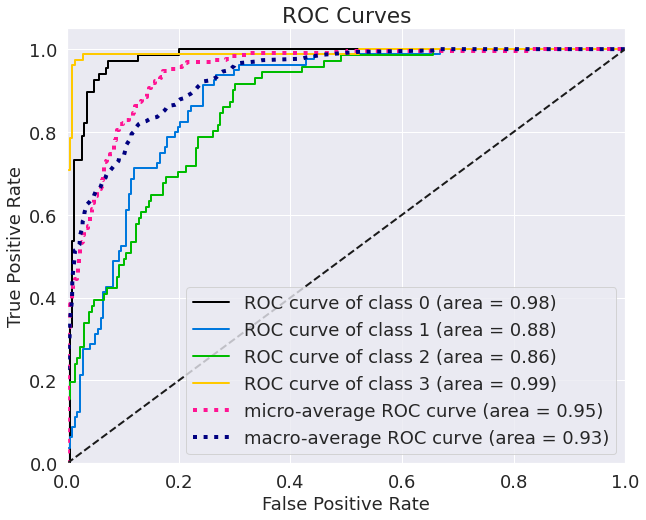

In [ ]:
prediction = b_lr.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, prediction, figsize=(10, 8))
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print('Исходные данные')
params = {'max_depth': np.linspace(1, 7, 7)}
dt = DecisionTreeClassifier()
b_dt_cv = GridSearchCV(dt, params, scoring='accuracy', cv=5)
b_dt_cv.fit(X_train, y_train)

print(b_dt_cv.best_params_)
max_depth = b_dt_cv.best_params_['max_depth']

b_dt = DecisionTreeClassifier(max_depth=max_depth)
b_dt.fit(X_train, y_train)
prediction = b_dt.predict(X_test)

print(accuracy_score(prediction, y_test))
print(f1_score(prediction, y_test, average='weighted'))

print('Преобразованные данные')
params = {'max_depth': np.linspace(1, 7, 7)}
dt = DecisionTreeClassifier()
b_dt_cv = GridSearchCV(dt, params, scoring='accuracy', cv=5)
b_dt_cv.fit(X_train_pca, y_train)

print(b_dt_cv.best_params_)
max_depth = b_dt_cv.best_params_['max_depth']

b_dt = DecisionTreeClassifier(max_depth=max_depth)
b_dt.fit(X_train_pca, y_train)
prediction = b_dt.predict(X_test_pca)

print(accuracy_score(prediction, y_test))
print(f1_score(prediction, y_test, average='weighted'))

#Для деревьев видно, что точность на деревьях сильнее падает

Исходные данные
{'max_depth': 4.0}
0.632996632996633
0.6404882481430458
Преобразованные данные
{'max_depth': 6.0}
0.4612794612794613
0.47068354838887827


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of N algorithms varying N from 2 to 100 (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


To build a __Bagging__ ensebmle you might generate 50 subsets of `train` data (of the same size as the original dataset) using bootstrap procedure. Then you train logistic regression/decision tree with optimal hyperparameters you estimated before on each subset. Finally, you average the models predictions.

*Hint: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm_notebook as load

f1_lr_train_list = []
f1_lr_test_list = []
accuracy_lr_train_list = []
accuracy_lr_test_list = []

for i in load(range(2, 100, 5)):
        bc = BaggingClassifier(base_estimator=b_lr, n_estimators=i, bootstrap=True, random_state=42, max_samples=100)
        bc.fit(X_train, y_train)
        prediction = bc.predict(X_train)
        f1_lr_train_list.append(f1_score(y_train, prediction, average='weighted'))
        accuracy_lr_train_list.append(accuracy_score(y_train, prediction))
        
        prediction = bc.predict(X_test)
        f1_lr_test_list.append(f1_score(y_test, prediction, average='weighted'))
        accuracy_lr_test_list.append(accuracy_score(y_test, prediction))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


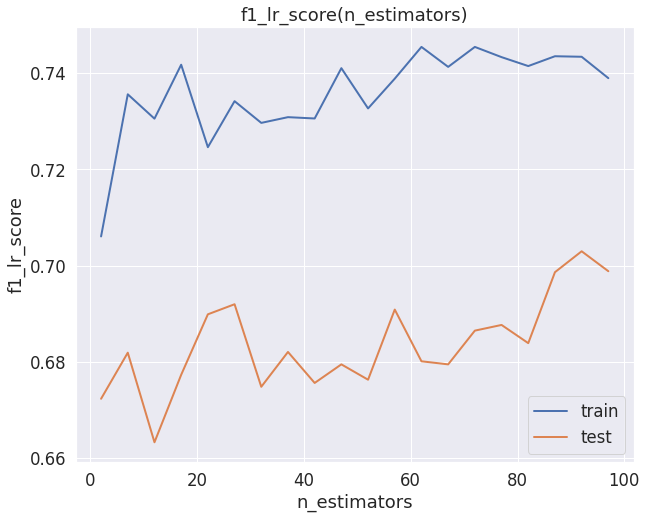

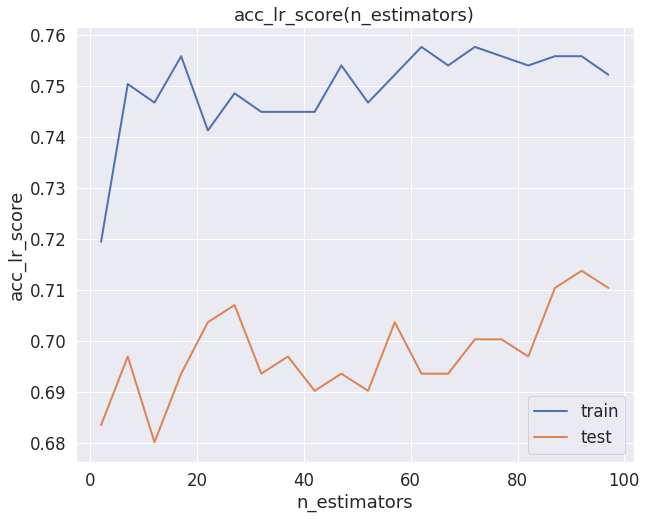

In [ ]:
X = []
for i in range(2, 100, 5):
    X.append(i)
    

plt.figure(figsize=(10, 8))
plt.plot(X, f1_lr_train_list, lw=2, label='train')
plt.plot(X, f1_lr_test_list, lw=2, label='test')
plt.xlabel('n_estimators')
plt.ylabel('f1_lr_score')
plt.title('f1_lr_score(n_estimators)')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(X, accuracy_lr_train_list, lw=2, label='train')
plt.plot(X, accuracy_lr_test_list, lw=2, label='test')
plt.xlabel('n_estimators')
plt.ylabel('acc_lr_score')
plt.title('acc_lr_score(n_estimators)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
f1_dt_train_list = []
f1_dt_test_list = []
accuracy_dt_train_list = []
accuracy_dt_test_list = []

for i in load(range(2,100, 5)):
        bc = BaggingClassifier(base_estimator=b_dt, n_estimators=i, bootstrap=True, random_state=42, max_samples=100)
        bc.fit(X_train, y_train)
        prediction = bc.predict(X_train)
        f1_dt_train_list.append(f1_score(y_train, prediction, average='weighted'))
        accuracy_dt_train_list.append(accuracy_score(y_train, prediction))
        
        prediction = bc.predict(X_test)
        f1_dt_test_list.append(f1_score(y_test, prediction, average='weighted'))
        accuracy_dt_test_list.append(accuracy_score(y_test, prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


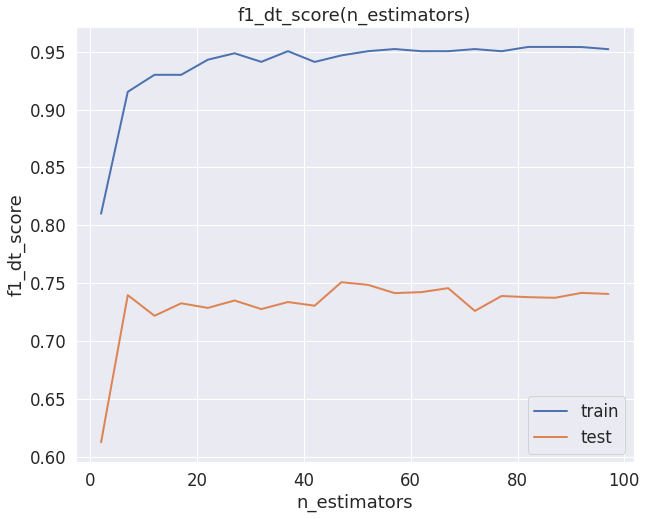

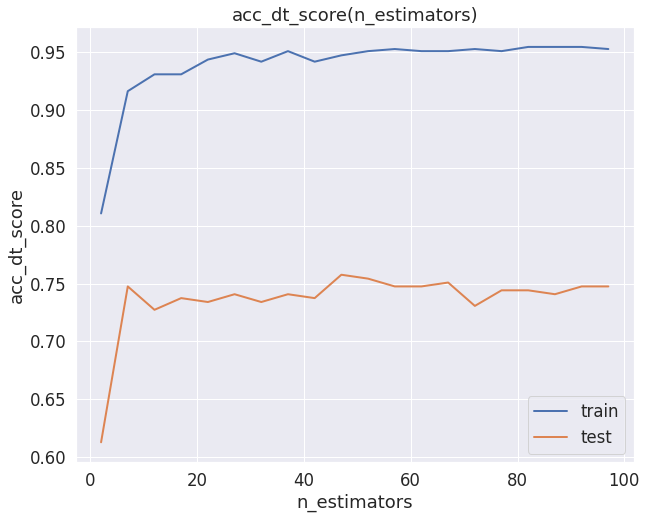

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(X, f1_dt_train_list, lw=2, label='train')
plt.plot(X, f1_dt_test_list, lw=2, label='test')
plt.xlabel('n_estimators')
plt.ylabel('f1_dt_score')
plt.title('f1_dt_score(n_estimators)')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(X, accuracy_dt_train_list, lw=2, label='train')
plt.plot(X, accuracy_dt_test_list, lw=2, label='test')
plt.xlabel('n_estimators')
plt.ylabel('acc_dt_score')
plt.title('acc_dt_score(n_estimators)')
plt.legend(loc='lower right')
plt.show()

Из графиков видно, что в случае логистическй регрессии результат колеблется в определеном промежутке, поэтому делаю вывод что неважно какое количество моделей берется.В случае дерева решений очевидно, что надо брать больш одной модели, так как уже при двух существенно вырастает точность, однако при выборе 10 и более моделей точность начинает опять колебаться в маленьком промежутке.

Вывод:

LogReg - не сильно важно, хватит 6 или 8.

DessTree - 1 < n_estimators < 10

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

f1_rf_train_list = []
f1_rf_test_list = []
accuracy_rf_train_list = []
accuracy_rf_test_list = []

for i in load(range(1,100, 2)):
        rf = RandomForestClassifier(n_estimators=i)
        rf.fit(X_train, y_train)
        
        prediction = rf.predict(X_train)
        f1_rf_train_list.append(f1_score(y_train, prediction, average='weighted'))
        accuracy_rf_train_list.append(accuracy_score(y_train, prediction))

        prediction = rf.predict(X_test)
        f1_rf_test_list.append(f1_score(y_test, prediction, average='weighted'))
        accuracy_rf_test_list.append(accuracy_score(y_test, prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


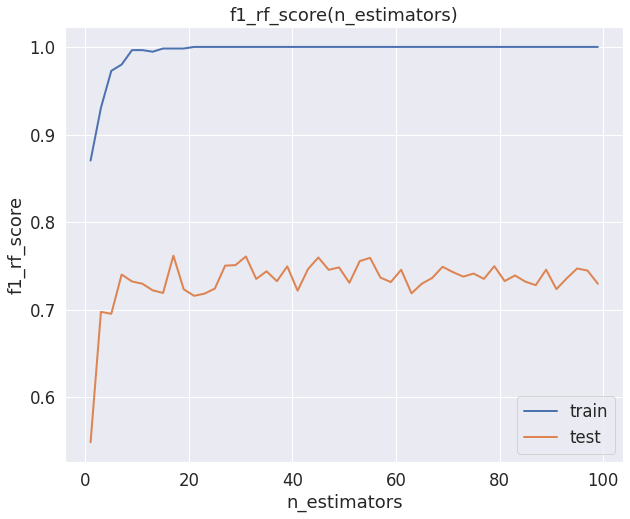

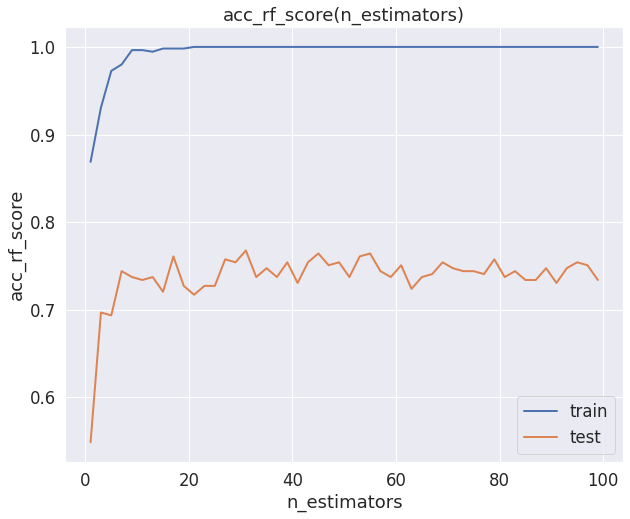

In [ ]:
X = []
for i in range(1, 100, 2):
    X.append(i)

plt.figure(figsize=(10, 8))
plt.plot(X, f1_rf_train_list, lw=2, label='train')
plt.plot(X, f1_rf_test_list, lw=2, label='test')
plt.xlabel('n_estimators')
plt.ylabel('f1_rf_score')
plt.title('f1_rf_score(n_estimators)')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(X, accuracy_rf_train_list, lw=2, label='train')
plt.plot(X, accuracy_rf_test_list, lw=2, label='test')
plt.xlabel('n_estimators')
plt.ylabel('acc_rf_score')
plt.legend(loc='lower right')
plt.title('acc_rf_score(n_estimators)')
plt.show()

При использовании random forest видно, что кол-во моделей должно быть в промежутке 1 < models < 10

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

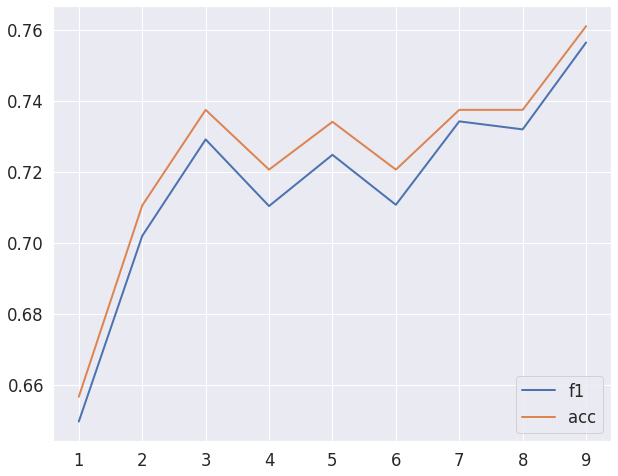

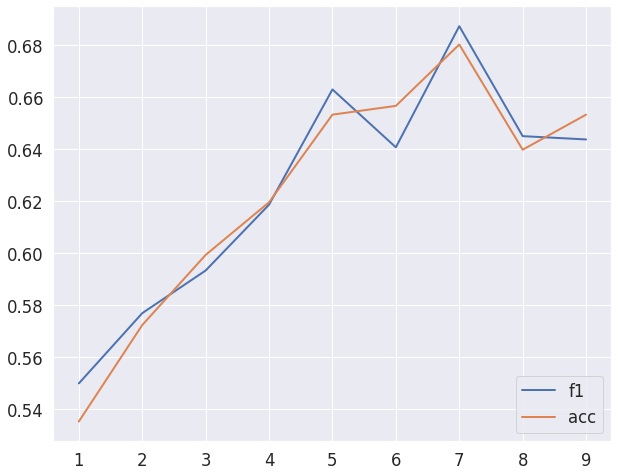

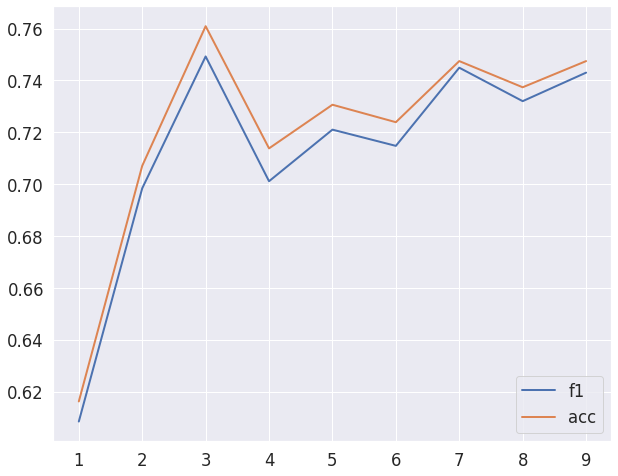

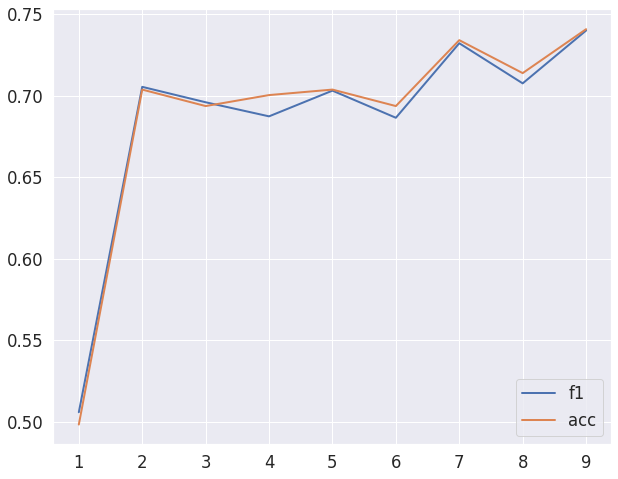

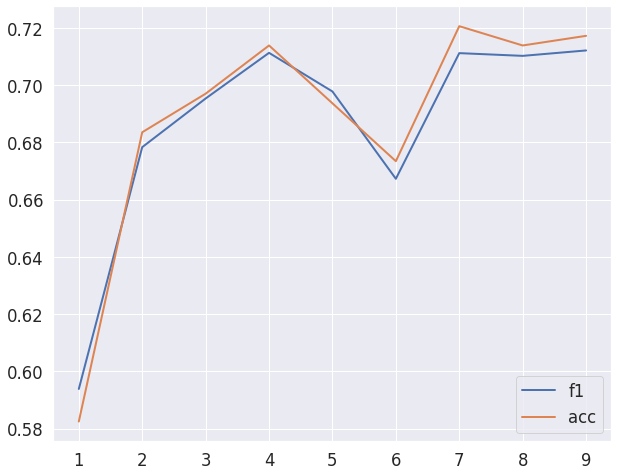

In [ ]:
X_train_split = []
y_train_split = []
for i in range(1,10):
    X_train_split.append(X_train[0:55*i])
    y_train_split.append(y_train[0:55*i])
    
X = []
for i in range(1, 10):
    X.append(i)
    
def print_f1_and_acc(model):
    f1 = []
    acc = []
    
    for i in range(0, 9):
        model.fit(X_train_split[i], y_train_split[i])
        f1.append(f1_score(y_test, model.predict(X_test), average='weighted'))
        acc.append(accuracy_score(y_test, model.predict(X_test)))
        
    plt.figure(figsize=(10, 8))
    plt.plot(X, f1, lw=2, label='f1')
    plt.plot(X, acc, lw=2, label='acc')
    plt.legend(loc='lower right')
    plt.show()
        
        
print_f1_and_acc(b_lr)
print_f1_and_acc(b_dt)        
print_f1_and_acc(BaggingClassifier(b_lr, n_estimators = 20, bootstrap=True))
print_f1_and_acc(BaggingClassifier(b_dt, n_estimators = 10, bootstrap=True))
print_f1_and_acc(RandomForestClassifier(n_estimators = 10))

Из графиков видно, что чем больше данных, тем больше точность. Это логично:)